# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Khoirul Husein
- **Email:** irul.husein31@gmail.com
- **ID Dicoding:** A290YBM249

## Menentukan Pertanyaan Bisnis

Dalam proyek analisis data ini, kita akan menganalisis dataset e-commerce publik untuk mendapatkan insight bisnis yang berharga. Berikut adalah pertanyaan bisnis yang akan kita jawab melalui analisis data:

1. Bagaimana pola pembelian pelanggan berdasarkan waktu (jam, hari, bulan) dan lokasi geografis, serta bagaimana hal ini dapat mempengaruhi strategi pemasaran?

2. Kategori produk apa yang paling populer dan menghasilkan pendapatan tertinggi, serta bagaimana kita dapat mengoptimalkan strategi penjualan berdasarkan performa kategori produk?

3. Bagaimana performa penjual (seller) berdasarkan lokasi, volume penjualan, dan rating pelanggan, serta apa rekomendasi untuk meningkatkan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

Pada bagian ini, kita akan mengimpor semua library yang diperlukan untuk analisis data e-commerce.

In [3]:
# Import library dasar untuk analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from datetime import datetime

# Konfigurasi visualisasi
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mengimpor file dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path ke folder dataset di Google Drive
# Sesuaikan path ini dengan lokasi folder dataset di Google Drive Anda
dataset_path = '/content/drive/My Drive/E-Commerce_Public_Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

Pada bagian ini, kita akan melakukan proses pengumpulan, penilaian, dan pembersihan data untuk memastikan kualitas data yang akan dianalisis.

### Gathering Data

Pada tahap ini, kita akan mengumpulkan data dari berbagai file CSV yang tersedia dalam dataset e-commerce.

In [5]:
# Membaca file CSV dari dataset e-commerce
customers_df = pd.read_csv(dataset_path + 'customers_dataset.csv')
geolocation_df = pd.read_csv(dataset_path + 'geolocation_dataset.csv')
order_items_df = pd.read_csv(dataset_path + 'order_items_dataset.csv')
order_payments_df = pd.read_csv(dataset_path + 'order_payments_dataset.csv')
order_reviews_df = pd.read_csv(dataset_path + 'order_reviews_dataset.csv')
orders_df = pd.read_csv(dataset_path + 'orders_dataset.csv')
products_df = pd.read_csv(dataset_path + 'products_dataset.csv')
sellers_df = pd.read_csv(dataset_path + 'sellers_dataset.csv')
category_name_translation_df = pd.read_csv(dataset_path + 'product_category_name_translation.csv')

# Menampilkan informasi tentang dataset customers
print("Dataset Customers:")
print(f"Jumlah baris: {customers_df.shape[0]}")
print(f"Jumlah kolom: {customers_df.shape[1]}")
customers_df.head()

Dataset Customers:
Jumlah baris: 99441
Jumlah kolom: 5


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Menampilkan informasi tentang dataset orders
print("Dataset Orders:")
print(f"Jumlah baris: {orders_df.shape[0]}")
print(f"Jumlah kolom: {orders_df.shape[1]}")
orders_df.head()

Dataset Orders:
Jumlah baris: 99441
Jumlah kolom: 8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# Menampilkan informasi tentang dataset products
print("Dataset Products:")
print(f"Jumlah baris: {products_df.shape[0]}")
print(f"Jumlah kolom: {products_df.shape[1]}")
products_df.head()

Dataset Products:
Jumlah baris: 32951
Jumlah kolom: 9


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Menampilkan informasi tentang dataset order_items
print("Dataset Order Items:")
print(f"Jumlah baris: {order_items_df.shape[0]}")
print(f"Jumlah kolom: {order_items_df.shape[1]}")
order_items_df.head()

Dataset Order Items:
Jumlah baris: 112650
Jumlah kolom: 7


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Menampilkan informasi tentang dataset category_name_translation
print("Dataset Category Name Translation:")
print(f"Jumlah baris: {category_name_translation_df.shape[0]}")
print(f"Jumlah kolom: {category_name_translation_df.shape[1]}")
category_name_translation_df.head()

Dataset Category Name Translation:
Jumlah baris: 71
Jumlah kolom: 2


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset e-commerce terdiri dari beberapa tabel yang saling terhubung, termasuk informasi pelanggan, pesanan, produk, penjual, dan lokasi geografis.
- Tabel customers berisi informasi tentang pelanggan seperti ID, kode pos, kota, dan negara bagian.
- Tabel orders berisi informasi tentang pesanan seperti status, waktu pembelian, waktu persetujuan, waktu pengiriman, dan estimasi waktu pengiriman.
- Tabel products berisi informasi tentang produk seperti kategori, dimensi, dan berat.
- Tabel order_items berisi informasi tentang item yang dibeli dalam pesanan, termasuk harga dan biaya pengiriman.
- Tabel category_name_translation menyediakan terjemahan nama kategori produk dari bahasa Portugis ke bahasa Inggris.

### Assessing Data

Pada tahap ini, kita akan menilai kualitas data untuk mengidentifikasi masalah seperti nilai yang hilang, duplikat, atau inkonsistensi.

In [10]:
# Memeriksa nilai yang hilang pada setiap dataset
print("Nilai yang hilang pada dataset customers:")
print(customers_df.isnull().sum())
print("\nNilai yang hilang pada dataset orders:")
print(orders_df.isnull().sum())
print("\nNilai yang hilang pada dataset products:")
print(products_df.isnull().sum())
print("\nNilai yang hilang pada dataset order_items:")
print(order_items_df.isnull().sum())
print("\nNilai yang hilang pada dataset order_reviews:")
print(order_reviews_df.isnull().sum())

Nilai yang hilang pada dataset customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Nilai yang hilang pada dataset orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Nilai yang hilang pada dataset products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Nilai yang hilang pada dataset order_items:
order_id               0
order_i

In [11]:
# Memeriksa tipe data pada dataset orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
# Memeriksa tipe data pada dataset products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
# Memeriksa duplikat pada dataset customers
print(f"Jumlah duplikat pada dataset customers: {customers_df.duplicated().sum()}")

# Memeriksa duplikat pada dataset orders
print(f"Jumlah duplikat pada dataset orders: {orders_df.duplicated().sum()}")

# Memeriksa duplikat pada dataset products
print(f"Jumlah duplikat pada dataset products: {products_df.duplicated().sum()}")

Jumlah duplikat pada dataset customers: 0
Jumlah duplikat pada dataset orders: 0
Jumlah duplikat pada dataset products: 0


In [14]:
# Memeriksa statistik deskriptif untuk dataset products
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [15]:
# Memeriksa nilai unik pada kolom order_status
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight:**
- Terdapat beberapa nilai yang hilang (null) di beberapa dataset, terutama pada kolom timestamp di dataset orders dan pada kolom kategori produk di dataset products.
- Kolom timestamp pada dataset orders perlu dikonversi ke format datetime untuk analisis temporal.
- Tidak ada duplikat pada dataset utama (customers, orders, products).
- Dataset products memiliki beberapa nilai ekstrem pada kolom dimensi dan berat yang mungkin perlu ditangani.
- Terdapat beberapa status pesanan yang berbeda, dengan 'delivered' sebagai status yang paling umum.

### Cleaning Data

Pada tahap ini, kita akan membersihkan data berdasarkan masalah yang telah diidentifikasi pada tahap penilaian.

In [16]:
# Mengkonversi kolom timestamp pada dataset orders menjadi format datetime
timestamp_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                     'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in timestamp_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])

# Memeriksa hasil konversi
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [17]:
# Mengkonversi kolom timestamp pada dataset order_reviews menjadi format datetime
review_timestamp_columns = ['review_creation_date', 'review_answer_timestamp']

for col in review_timestamp_columns:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

# Memeriksa hasil konversi
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [18]:
# Menangani nilai yang hilang pada dataset products
# Menampilkan jumlah nilai yang hilang pada kolom product_category_name
print(f"Jumlah nilai yang hilang pada kolom product_category_name: {products_df['product_category_name'].isnull().sum()}")

# Mengisi nilai yang hilang pada kolom product_category_name dengan 'unknown'
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

# Memeriksa hasil pengisian nilai yang hilang
print(f"Jumlah nilai yang hilang pada kolom product_category_name setelah dibersihkan: {products_df['product_category_name'].isnull().sum()}")

Jumlah nilai yang hilang pada kolom product_category_name: 610
Jumlah nilai yang hilang pada kolom product_category_name setelah dibersihkan: 0


In [19]:
# Menangani nilai yang hilang pada dataset orders
# Menampilkan jumlah nilai yang hilang pada kolom timestamp
for col in timestamp_columns:
    print(f"Jumlah nilai yang hilang pada kolom {col}: {orders_df[col].isnull().sum()}")

# Kita hanya akan menggunakan pesanan dengan status 'delivered' untuk analisis pengiriman
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered'].copy()
print(f"Jumlah pesanan dengan status 'delivered': {delivered_orders_df.shape[0]}")

Jumlah nilai yang hilang pada kolom order_purchase_timestamp: 0
Jumlah nilai yang hilang pada kolom order_approved_at: 160
Jumlah nilai yang hilang pada kolom order_delivered_carrier_date: 1783
Jumlah nilai yang hilang pada kolom order_delivered_customer_date: 2965
Jumlah nilai yang hilang pada kolom order_estimated_delivery_date: 0
Jumlah pesanan dengan status 'delivered': 96478


In [20]:
# Menggabungkan dataset products dengan category_name_translation untuk mendapatkan nama kategori dalam bahasa Inggris
products_with_category_df = products_df.merge(category_name_translation_df, on='product_category_name', how='left')

# Mengisi nilai yang hilang pada kolom product_category_name_english dengan nilai dari product_category_name
products_with_category_df['product_category_name_english'] = products_with_category_df['product_category_name_english'].fillna(products_with_category_df['product_category_name'])

# Memeriksa hasil penggabungan
products_with_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [21]:
# Menghitung waktu pengiriman (dalam hari) untuk pesanan yang telah dikirim
delivered_orders_df['delivery_time_days'] = (delivered_orders_df['order_delivered_customer_date'] -
                                            delivered_orders_df['order_purchase_timestamp']).dt.days

# Menghitung selisih antara estimasi dan aktual pengiriman (dalam hari)
delivered_orders_df['delivery_vs_estimate_days'] = (delivered_orders_df['order_delivered_customer_date'] -
                                                  delivered_orders_df['order_estimated_delivery_date']).dt.days

# Nilai negatif berarti pengiriman lebih cepat dari estimasi
# Memeriksa hasil perhitungan
delivered_orders_df[['order_id', 'delivery_time_days', 'delivery_vs_estimate_days']].head()

,order_id,delivery_time_days,delivery_vs_estimate_days
0,e481f51cbdc54678b7cc49136f2d6af7,8.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,13.0,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,9.0,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,13.0,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2.0,-10.0


**Insight:**
- Kolom timestamp pada dataset orders dan order_reviews telah dikonversi ke format datetime untuk memudahkan analisis temporal.
- Nilai yang hilang pada kolom product_category_name telah diisi dengan 'unknown'.
- Dataset orders telah difilter untuk hanya menyertakan pesanan dengan status 'delivered' untuk analisis pengiriman.
- Dataset products telah digabungkan dengan dataset category_name_translation untuk mendapatkan nama kategori dalam bahasa Inggris.
- Telah ditambahkan kolom baru untuk menghitung waktu pengiriman dan selisih antara estimasi dan aktual pengiriman.

## Exploratory Data Analysis (EDA)

Pada bagian ini, kita akan melakukan eksplorasi data untuk memahami pola dan tren dalam dataset e-commerce.

### Eksplorasi Pola Pembelian Berdasarkan Waktu

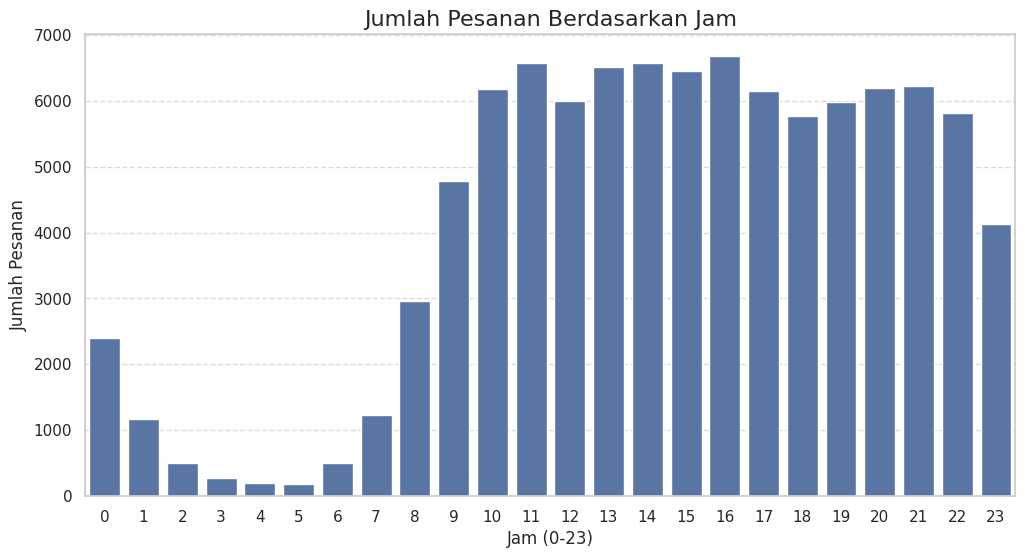

In [22]:
# Ekstrak informasi waktu dari order_purchase_timestamp
orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour
orders_df['purchase_day'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month_name()
orders_df['purchase_year'] = orders_df['order_purchase_timestamp'].dt.year

# Analisis pola pembelian berdasarkan jam
hourly_orders = orders_df['purchase_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values)
plt.title('Jumlah Pesanan Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

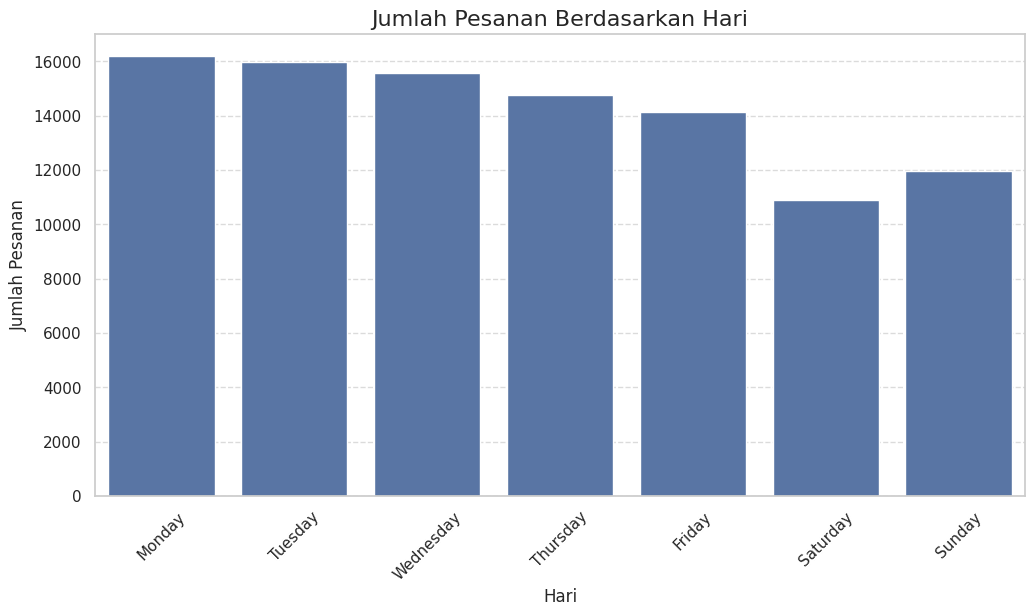

In [23]:
# Analisis pola pembelian berdasarkan hari
# Mengurutkan hari dalam seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders = orders_df['purchase_day'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=daily_orders.index, y=daily_orders.values)
plt.title('Jumlah Pesanan Berdasarkan Hari', fontsize=16)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

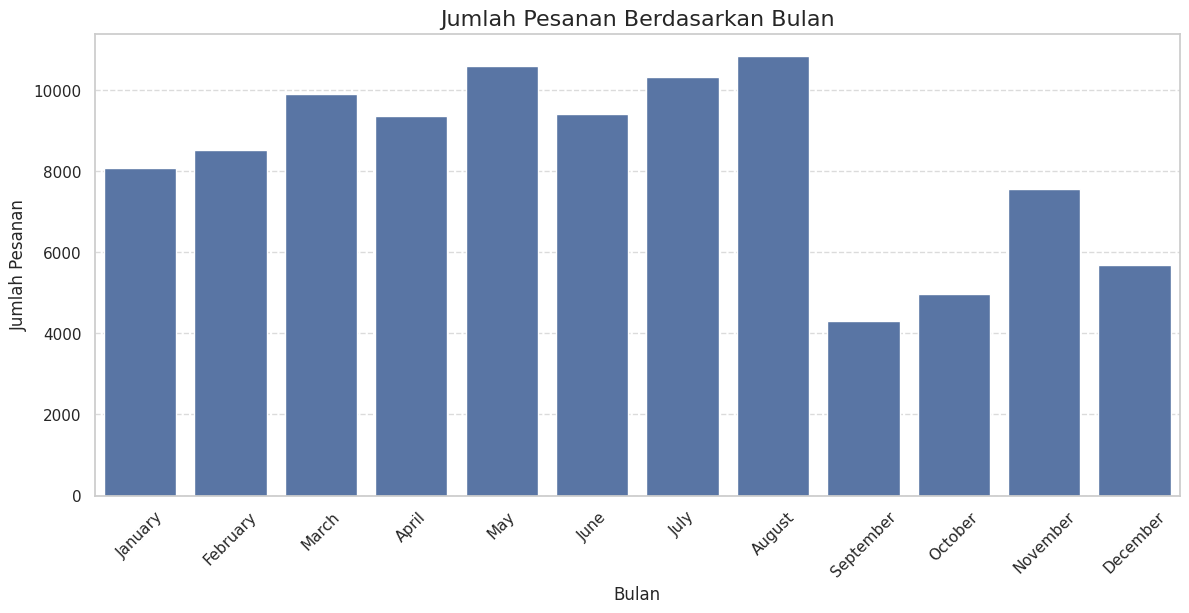

In [24]:
# Analisis pola pembelian berdasarkan bulan
# Mengurutkan bulan dalam setahun
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_orders = orders_df['purchase_month'].value_counts().reindex(month_order)

plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values)
plt.title('Jumlah Pesanan Berdasarkan Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

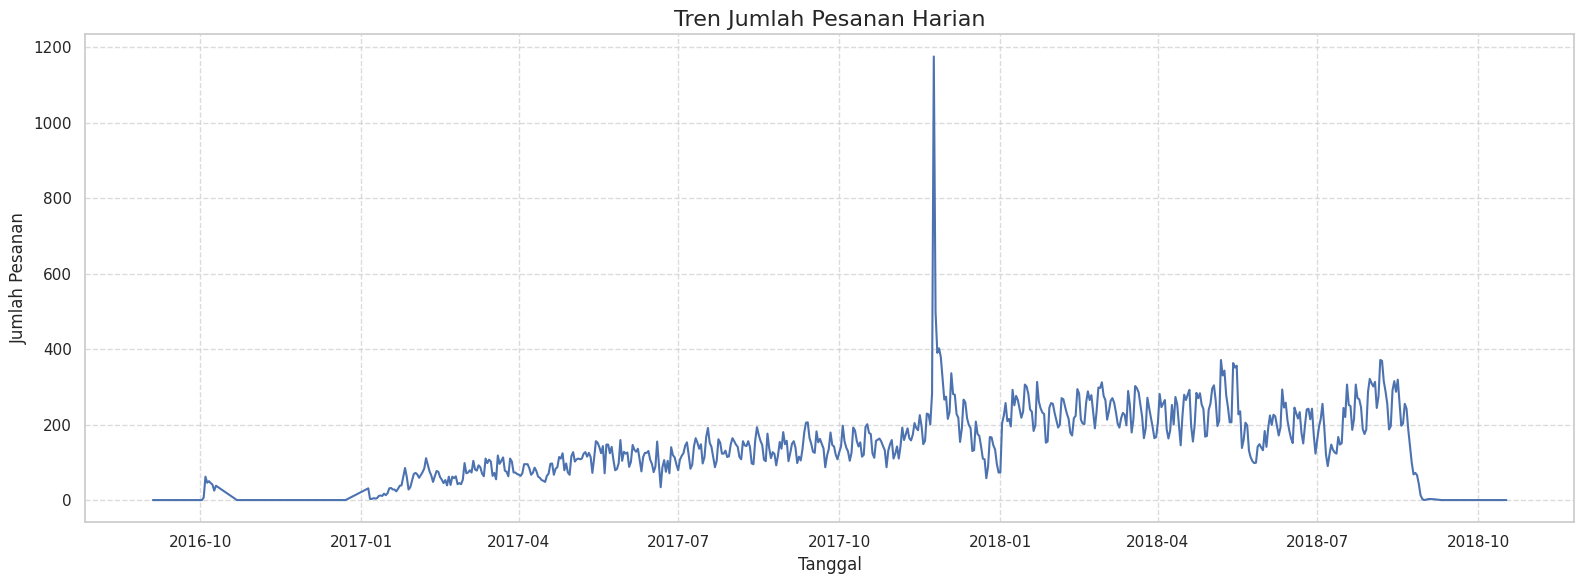

In [25]:
# Analisis tren pembelian berdasarkan waktu (time series)
orders_df['purchase_date'] = orders_df['order_purchase_timestamp'].dt.date
daily_order_counts = orders_df.groupby('purchase_date').size().reset_index(name='order_count')
daily_order_counts['purchase_date'] = pd.to_datetime(daily_order_counts['purchase_date'])

plt.figure(figsize=(16, 6))
plt.plot(daily_order_counts['purchase_date'], daily_order_counts['order_count'])
plt.title('Tren Jumlah Pesanan Harian', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Pola pembelian berdasarkan jam menunjukkan bahwa pelanggan paling banyak melakukan pembelian pada siang hingga sore hari, dengan puncaknya pada jam 10-18.
- Berdasarkan hari, pembelian paling banyak terjadi pada hari kerja (Senin-Jumat), dengan penurunan pada akhir pekan.
- Terdapat variasi musiman dalam pembelian bulanan, dengan peningkatan pada bulan-bulan tertentu yang mungkin terkait dengan musim liburan atau promosi khusus.
- Tren pembelian harian menunjukkan peningkatan secara keseluruhan dari waktu ke waktu, dengan beberapa fluktuasi yang mungkin terkait dengan kampanye pemasaran atau faktor eksternal lainnya.

### Eksplorasi Kategori Produk dan Pendapatan

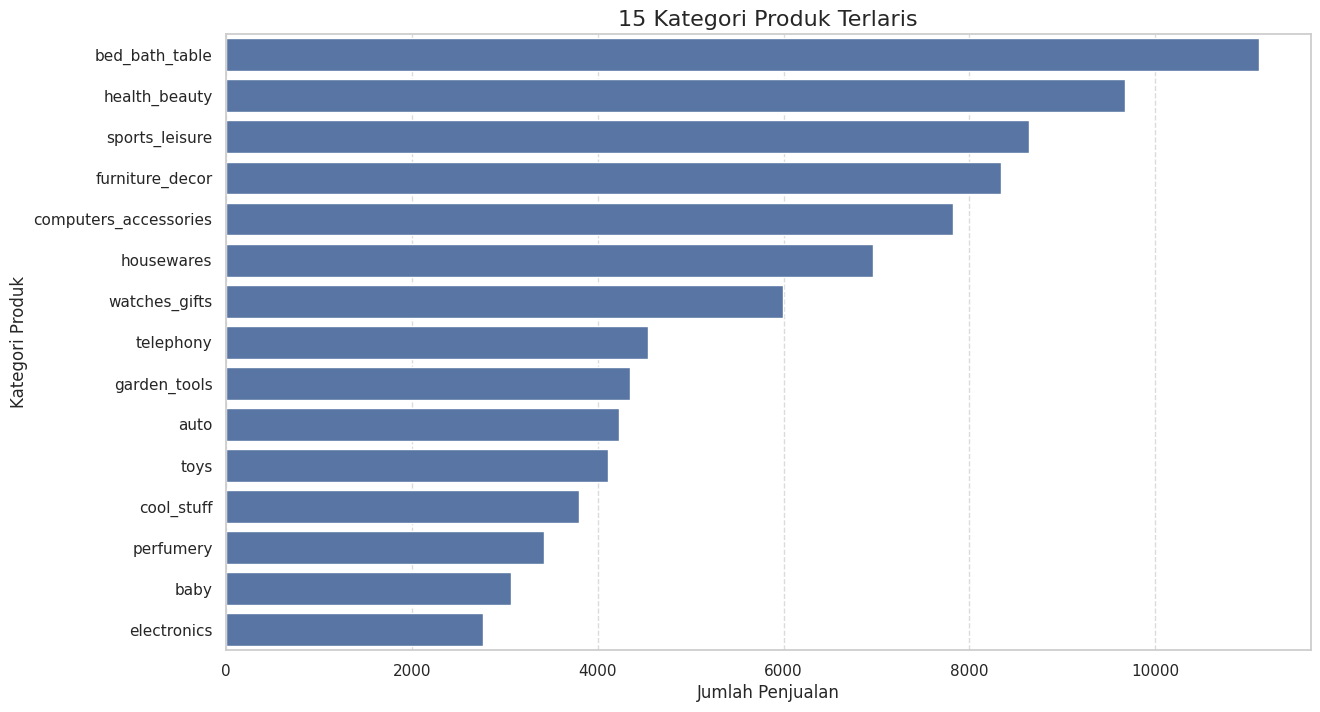

In [26]:
# Menggabungkan dataset order_items dengan products_with_category untuk analisis kategori produk
order_items_with_category = order_items_df.merge(products_with_category_df, on='product_id', how='left')

# Menghitung jumlah produk yang terjual per kategori
category_sales_count = order_items_with_category.groupby('product_category_name_english').size().reset_index(name='sales_count')
category_sales_count = category_sales_count.sort_values('sales_count', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='sales_count', y='product_category_name_english', data=category_sales_count)
plt.title('15 Kategori Produk Terlaris', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

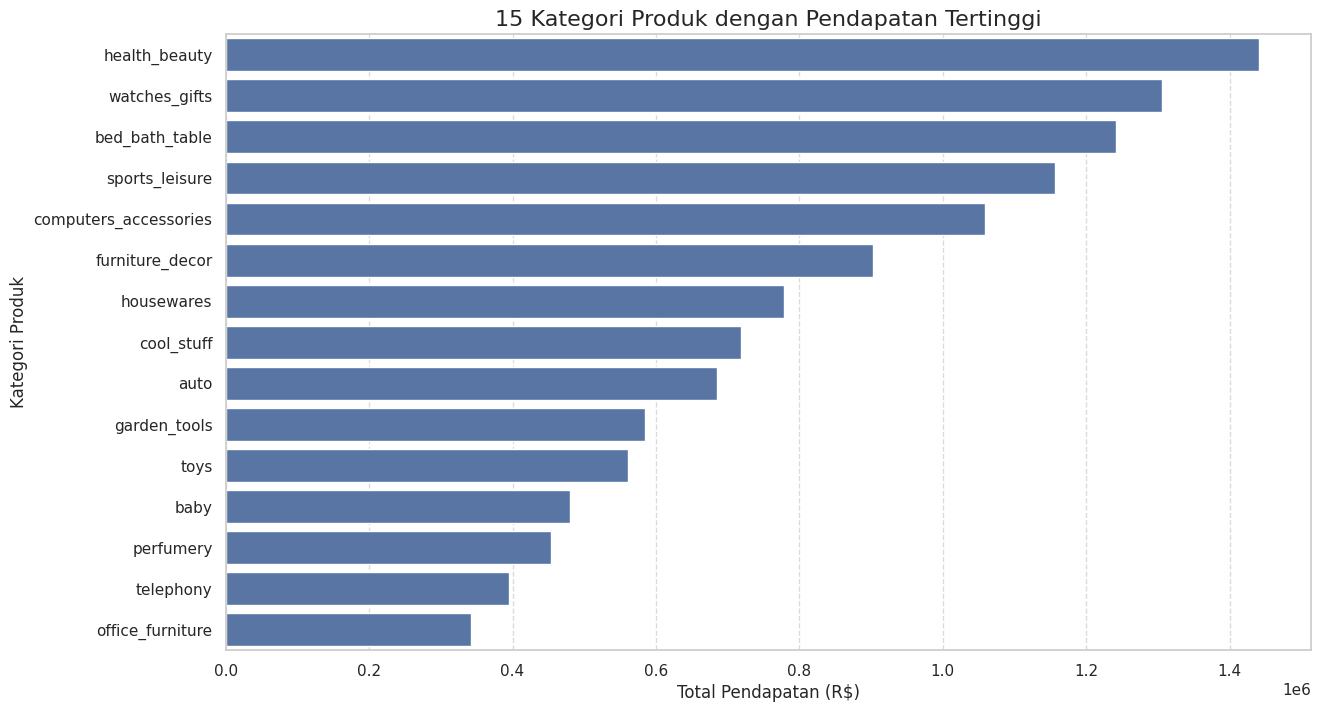

In [27]:
# Menghitung total pendapatan per kategori produk
order_items_with_category['total_price'] = order_items_with_category['price'] + order_items_with_category['freight_value']
category_revenue = order_items_with_category.groupby('product_category_name_english')['total_price'].sum().reset_index()
category_revenue = category_revenue.sort_values('total_price', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='total_price', y='product_category_name_english', data=category_revenue)
plt.title('15 Kategori Produk dengan Pendapatan Tertinggi', fontsize=16)
plt.xlabel('Total Pendapatan (R$)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

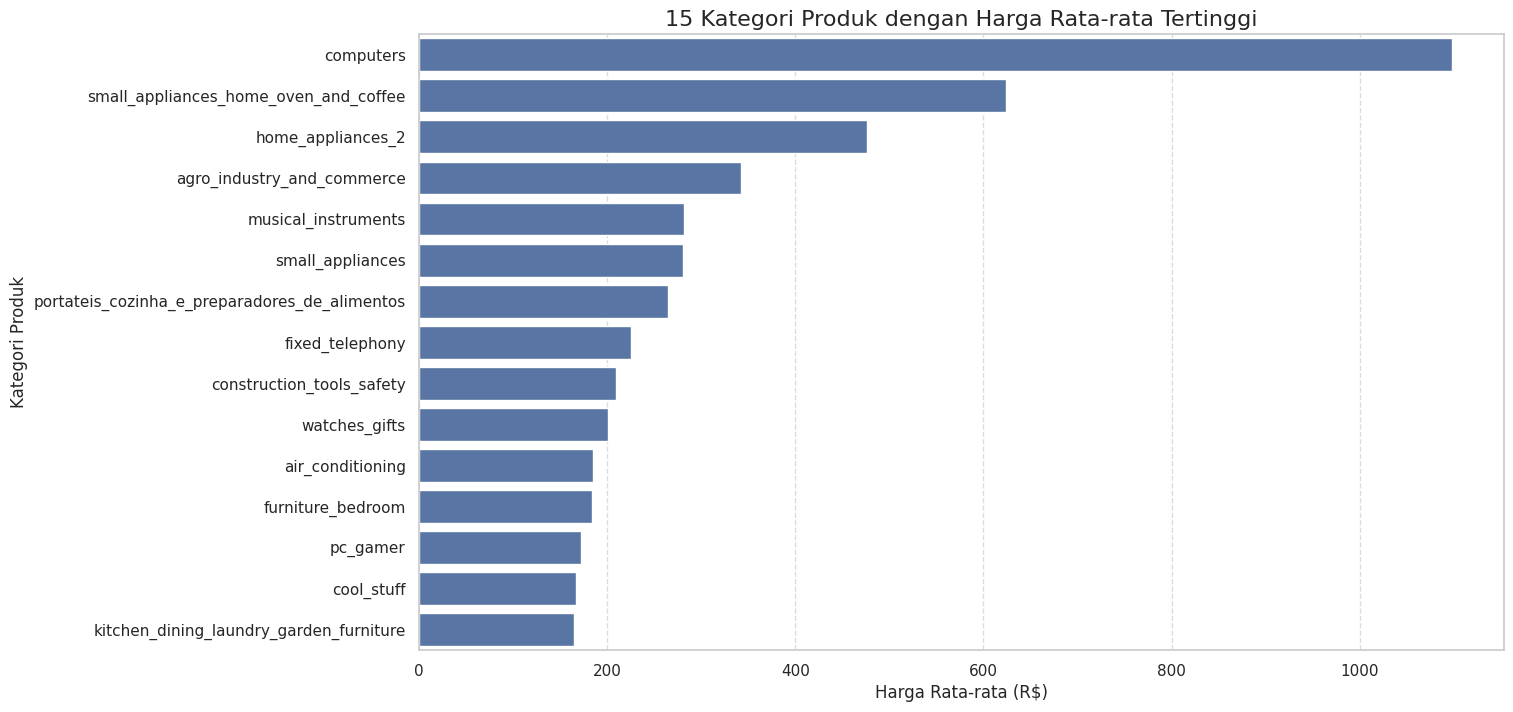

In [28]:
# Menghitung harga rata-rata per kategori produk
category_avg_price = order_items_with_category.groupby('product_category_name_english')['price'].mean().reset_index()
category_avg_price = category_avg_price.sort_values('price', ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='product_category_name_english', data=category_avg_price)
plt.title('15 Kategori Produk dengan Harga Rata-rata Tertinggi', fontsize=16)
plt.xlabel('Harga Rata-rata (R$)', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

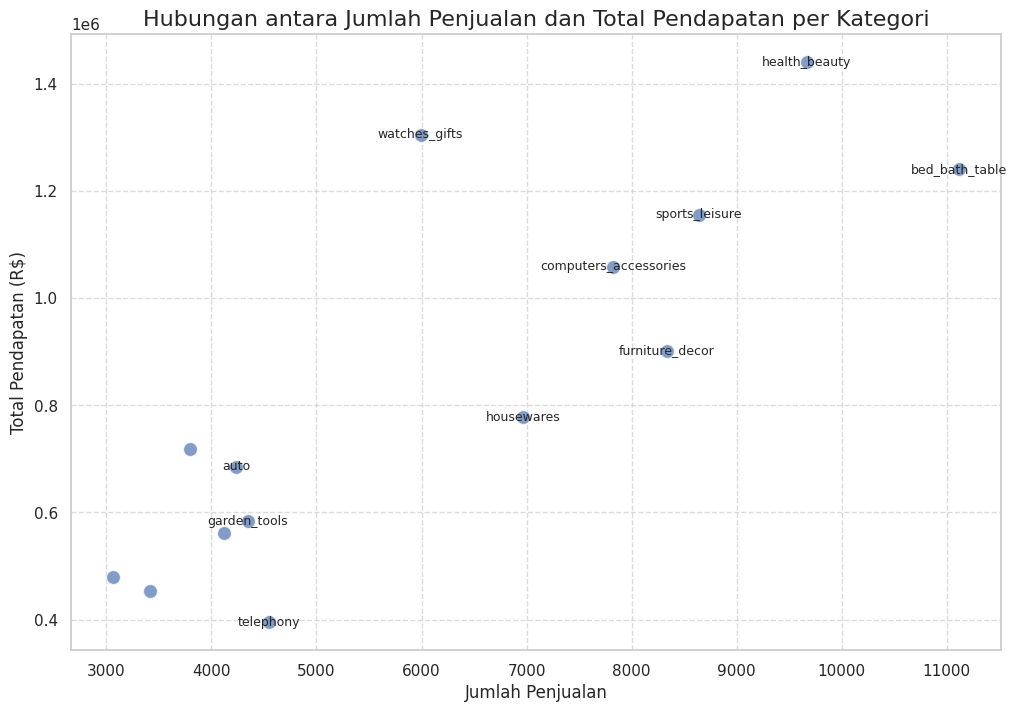

In [29]:
# Analisis korelasi antara jumlah penjualan dan pendapatan per kategori
category_analysis = category_sales_count.merge(category_revenue, on='product_category_name_english', how='inner')
category_analysis = category_analysis.rename(columns={'total_price': 'total_revenue'})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='sales_count', y='total_revenue', data=category_analysis, s=100, alpha=0.7)

# Menambahkan label untuk beberapa kategori teratas
for i, row in category_analysis.head(10).iterrows():
    plt.text(row['sales_count'], row['total_revenue'], row['product_category_name_english'],
             fontsize=9, ha='center', va='center')

plt.title('Hubungan antara Jumlah Penjualan dan Total Pendapatan per Kategori', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Total Pendapatan (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Visualization & Explanatory Analysis

Pada bagian ini, kita akan membuat visualisasi yang lebih mendalam untuk menjawab pertanyaan bisnis yang telah dirumuskan.

### Pertanyaan 1: Bagaimana pola pembelian pelanggan berdasarkan waktu dan lokasi geografis?

In [30]:
# Visualisasi interaktif pola pembelian berdasarkan jam dan hari menggunakan Plotly
# Membuat pivot table untuk heatmap jam vs hari
orders_df['purchase_day_num'] = orders_df['order_purchase_timestamp'].dt.dayofweek
hour_day_pivot = pd.crosstab(index=orders_df['purchase_hour'], columns=orders_df['purchase_day_num'])
hour_day_pivot.columns = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Membuat heatmap dengan Plotly
fig = px.imshow(hour_day_pivot,
                labels=dict(x="Hari", y="Jam", color="Jumlah Pesanan"),
                x=hour_day_pivot.columns,
                y=hour_day_pivot.index,
                title='Pola Pembelian Berdasarkan Jam dan Hari',
                color_continuous_scale='Viridis')

fig.update_layout(width=800, height=600)
fig.show()

In [31]:
# Analisis pola pembelian berdasarkan lokasi geografis
# Menggabungkan dataset orders dengan customers untuk mendapatkan informasi lokasi
orders_with_location = orders_df.merge(customers_df, on='customer_id', how='left')

# Menghitung jumlah pesanan per negara bagian
state_orders = orders_with_location['customer_state'].value_counts().reset_index()
state_orders.columns = ['customer_state', 'order_count']

# Visualisasi jumlah pesanan per negara bagian menggunakan Plotly
fig = px.bar(state_orders.head(10),
             x='customer_state',
             y='order_count',
             title='10 Negara Bagian dengan Jumlah Pesanan Tertinggi',
             labels={'customer_state': 'Negara Bagian', 'order_count': 'Jumlah Pesanan'},
             color='order_count',
             color_continuous_scale='Viridis')

fig.update_layout(width=800, height=500)
fig.show()

In [32]:
# Analisis pola pembelian berdasarkan waktu dan lokasi
# Menggabungkan informasi waktu dan lokasi
top_states = state_orders.head(5)['customer_state'].tolist()
orders_top_states = orders_with_location[orders_with_location['customer_state'].isin(top_states)]

# Menghitung jumlah pesanan per jam untuk setiap negara bagian teratas
hourly_state_orders = orders_top_states.groupby(['purchase_hour', 'customer_state']).size().reset_index(name='order_count')

# Visualisasi pola pembelian per jam untuk setiap negara bagian teratas
fig = px.line(hourly_state_orders,
              x='purchase_hour',
              y='order_count',
              color='customer_state',
              title='Pola Pembelian per Jam untuk 5 Negara Bagian Teratas',
              labels={'purchase_hour': 'Jam', 'order_count': 'Jumlah Pesanan', 'customer_state': 'Negara Bagian'})

fig.update_layout(width=900, height=500)
fig.show()

### Pertanyaan 2: Kategori produk apa yang paling populer dan menghasilkan pendapatan tertinggi?

In [33]:
# Visualisasi interaktif kategori produk terlaris dan pendapatan tertinggi menggunakan Plotly
# Menggabungkan informasi jumlah penjualan dan pendapatan
top_categories = category_analysis.sort_values('sales_count', ascending=False).head(10)

# Membuat subplot dengan dua grafik
fig = make_subplots(rows=1, cols=2, subplot_titles=('10 Kategori Produk Terlaris', '10 Kategori dengan Pendapatan Tertinggi'))

# Grafik kategori terlaris
fig.add_trace(
    go.Bar(x=top_categories['sales_count'],
           y=top_categories['product_category_name_english'],
           orientation='h',
           marker_color='rgba(55, 83, 109, 0.7)',
           name='Jumlah Penjualan'),
    row=1, col=1
)

# Grafik kategori dengan pendapatan tertinggi
top_revenue_categories = category_analysis.sort_values('total_revenue', ascending=False).head(10)
fig.add_trace(
    go.Bar(x=top_revenue_categories['total_revenue'],
           y=top_revenue_categories['product_category_name_english'],
           orientation='h',
           marker_color='rgba(26, 118, 255, 0.7)',
           name='Total Pendapatan'),
    row=1, col=2
)

fig.update_layout(height=500, width=1200, showlegend=False)
fig.update_xaxes(title_text='Jumlah Penjualan', row=1, col=1)
fig.update_xaxes(title_text='Total Pendapatan (R$)', row=1, col=2)
fig.update_yaxes(title_text='Kategori Produk', row=1, col=1)
fig.update_yaxes(title_text='', row=1, col=2)

fig.show()

In [34]:
# Analisis tren penjualan kategori produk teratas dari waktu ke waktu
# Menggabungkan dataset order_items dengan orders untuk mendapatkan informasi waktu
order_items_with_time = order_items_with_category.merge(orders_df[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

# Ekstrak bulan dan tahun dari timestamp
order_items_with_time['purchase_year_month'] = order_items_with_time['order_purchase_timestamp'].dt.to_period('M')

# Memilih 5 kategori teratas berdasarkan jumlah penjualan
top_5_categories = category_sales_count.head(5)['product_category_name_english'].tolist()

# Menghitung jumlah penjualan bulanan untuk 5 kategori teratas
monthly_category_sales = order_items_with_time[order_items_with_time['product_category_name_english'].isin(top_5_categories)]
monthly_category_sales = monthly_category_sales.groupby(['purchase_year_month', 'product_category_name_english']).size().reset_index(name='sales_count')
monthly_category_sales['purchase_year_month'] = monthly_category_sales['purchase_year_month'].astype(str)

# Visualisasi tren penjualan bulanan untuk 5 kategori teratas
fig = px.line(monthly_category_sales,
              x='purchase_year_month',
              y='sales_count',
              color='product_category_name_english',
              title='Tren Penjualan Bulanan untuk 5 Kategori Produk Teratas',
              labels={'purchase_year_month': 'Bulan', 'sales_count': 'Jumlah Penjualan', 'product_category_name_english': 'Kategori Produk'})

fig.update_layout(width=1000, height=500, xaxis_tickangle=-45)
fig.show()

In [35]:
# Analisis hubungan antara harga produk dan jumlah penjualan
# Menghitung harga rata-rata dan jumlah penjualan per kategori
category_price_sales = order_items_with_category.groupby('product_category_name_english').agg(
    avg_price=('price', 'mean'),
    sales_count=('order_id', 'count')
).reset_index()

# Visualisasi hubungan antara harga rata-rata dan jumlah penjualan
fig = px.scatter(category_price_sales,
                 x='avg_price',
                 y='sales_count',
                 text='product_category_name_english',
                 title='Hubungan antara Harga Rata-rata dan Jumlah Penjualan per Kategori',
                 labels={'avg_price': 'Harga Rata-rata (R$)', 'sales_count': 'Jumlah Penjualan'},
                 size='sales_count',
                 color='avg_price',
                 color_continuous_scale='Viridis')

fig.update_traces(textposition='top center', textfont_size=8)
fig.update_layout(width=900, height=600)
fig.show()

**Insight:**
- Pola pembelian berdasarkan jam dan hari menunjukkan bahwa pelanggan paling aktif melakukan pembelian pada jam kerja (10:00-18:00) pada hari kerja (Senin-Jumat).
- Negara bagian SP (São Paulo) memiliki jumlah pesanan tertinggi, diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais), yang mencerminkan konsentrasi populasi di Brasil.
- Kategori produk terlaris adalah bed_bath_table (tempat tidur, meja, dan perlengkapan kamar mandi), diikuti oleh health_beauty (kesehatan dan kecantikan) dan sports_leisure (olahraga dan rekreasi).
- Kategori dengan pendapatan tertinggi tidak selalu sama dengan kategori terlaris, dengan computers_accessories (komputer dan aksesori) dan watches_gifts (jam tangan dan hadiah) menghasilkan pendapatan tinggi meskipun jumlah penjualannya lebih rendah.
- Terdapat korelasi negatif antara harga rata-rata produk dan jumlah penjualan, yang menunjukkan bahwa produk dengan harga lebih rendah cenderung terjual lebih banyak.

### Pertanyaan 3: Bagaimana performa penjual berdasarkan lokasi, volume penjualan, dan rating pelanggan?

In [36]:
# Menggabungkan dataset order_items dengan sellers untuk mendapatkan informasi penjual
order_items_with_seller = order_items_df.merge(sellers_df, on='seller_id', how='left')

# Menghitung jumlah penjualan dan pendapatan per penjual
seller_performance = order_items_with_seller.groupby('seller_id').agg(
    sales_count=('order_id', 'count'),
    total_revenue=('price', 'sum'),
    avg_price=('price', 'mean'),
    seller_state=('seller_state', 'first'),
    seller_city=('seller_city', 'first')
).reset_index()

# Menggabungkan dengan informasi rating dari order_reviews
# Pertama, menghitung rating rata-rata per pesanan
order_ratings = order_reviews_df.groupby('order_id')['review_score'].mean().reset_index()

# Kemudian, menggabungkan dengan order_items untuk mendapatkan rating per penjual
order_items_with_rating = order_items_df.merge(order_ratings, on='order_id', how='left')
seller_ratings = order_items_with_rating.groupby('seller_id')['review_score'].mean().reset_index()

# Menggabungkan performa penjual dengan rating
seller_performance = seller_performance.merge(seller_ratings, on='seller_id', how='left')

# Visualisasi performa penjual berdasarkan lokasi
state_performance = seller_performance.groupby('seller_state').agg(
    seller_count=('seller_id', 'nunique'),
    avg_sales=('sales_count', 'mean'),
    avg_revenue=('total_revenue', 'mean'),
    avg_rating=('review_score', 'mean')
).reset_index()

# Menampilkan 10 negara bagian teratas berdasarkan jumlah penjual
top_seller_states = state_performance.sort_values('seller_count', ascending=False).head(10)

fig = px.bar(top_seller_states,
             x='seller_state',
             y='seller_count',
             title='10 Negara Bagian dengan Jumlah Penjual Tertinggi',
             labels={'seller_state': 'Negara Bagian', 'seller_count': 'Jumlah Penjual'},
             color='avg_rating',
             color_continuous_scale='RdYlGn',
             text='avg_rating')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

In [37]:
# Analisis hubungan antara volume penjualan dan rating penjual
# Menambahkan kategori berdasarkan volume penjualan
seller_performance['sales_category'] = pd.qcut(seller_performance['sales_count'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Menghitung rating rata-rata per kategori volume penjualan
sales_category_ratings = seller_performance.groupby('sales_category')['review_score'].agg(['mean', 'count']).reset_index()

# Visualisasi rating rata-rata berdasarkan kategori volume penjualan
fig = px.bar(sales_category_ratings,
             x='sales_category',
             y='mean',
             title='Rating Rata-rata Berdasarkan Volume Penjualan',
             labels={'sales_category': 'Kategori Volume Penjualan', 'mean': 'Rating Rata-rata'},
             color='mean',
             color_continuous_scale='RdYlGn',
             text='count')

fig.update_traces(texttemplate='%{text} penjual', textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

In [38]:
# Analisis waktu pengiriman dan pengaruhnya terhadap rating
# Menggabungkan dataset orders dengan order_reviews
delivery_reviews = delivered_orders_df.merge(order_reviews_df, on='order_id', how='inner')

# Mengelompokkan waktu pengiriman menjadi beberapa kategori
delivery_reviews['delivery_time_category'] = pd.cut(delivery_reviews['delivery_time_days'],
                                                  bins=[0, 7, 14, 21, 28, float('inf')],
                                                  labels=['1 week', '2 weeks', '3 weeks', '4 weeks', '> 4 weeks'])

# Menghitung rating rata-rata per kategori waktu pengiriman
delivery_time_ratings = delivery_reviews.groupby('delivery_time_category')['review_score'].agg(['mean', 'count']).reset_index()

# Visualisasi rating rata-rata berdasarkan waktu pengiriman
fig = px.bar(delivery_time_ratings,
             x='delivery_time_category',
             y='mean',
             title='Rating Rata-rata Berdasarkan Waktu Pengiriman',
             labels={'delivery_time_category': 'Waktu Pengiriman', 'mean': 'Rating Rata-rata'},
             color='mean',
             color_continuous_scale='RdYlGn',
             text='count')

fig.update_traces(texttemplate='%{text} pesanan', textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

## Analisis Lanjutan (Opsional)

Pada bagian ini, kita akan melakukan analisis RFM (Recency, Frequency, Monetary) untuk segmentasi pelanggan.

In [39]:
# Analisis RFM (Recency, Frequency, Monetary)
# Menggabungkan dataset orders dengan order_items untuk mendapatkan informasi moneter
orders_with_items = orders_df.merge(order_items_df, on='order_id', how='left')
orders_with_items['total_price'] = orders_with_items['price'] + orders_with_items['freight_value']

# Menentukan tanggal referensi (tanggal terakhir dalam dataset + 1 hari)
reference_date = orders_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Menghitung RFM untuk setiap pelanggan
rfm = orders_with_items.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency (dalam hari)
    'order_id': 'nunique',  # Frequency
    'total_price': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Membuat skor RFM (1-5, 5 adalah yang terbaik)
# Recency: nilai lebih rendah lebih baik (pelanggan yang baru saja membeli)
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# Frequency: nilai lebih tinggi lebih baik
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
# Monetary: nilai lebih tinggi lebih baik
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Menghitung skor RFM gabungan
rfm['rfm_score'] = rfm['r_score'].astype(int) + rfm['f_score'].astype(int) + rfm['m_score'].astype(int)

# Membuat segmen pelanggan berdasarkan skor RFM
rfm['customer_segment'] = pd.qcut(rfm['rfm_score'], 4, labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

# Menampilkan hasil segmentasi
segment_counts = rfm['customer_segment'].value_counts().reset_index()
segment_counts.columns = ['customer_segment', 'count']

# Visualisasi segmen pelanggan
fig = px.pie(segment_counts,
             values='count',
             names='customer_segment',
             title='Segmentasi Pelanggan Berdasarkan Analisis RFM',
             color='customer_segment',
             color_discrete_map={'Bronze': '#CD7F32', 'Silver': '#C0C0C0', 'Gold': '#FFD700', 'Platinum': '#E5E4E2'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=700, height=500)
fig.show()

In [40]:
# Analisis karakteristik setiap segmen pelanggan
segment_analysis = rfm.groupby('customer_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
}).reset_index()

segment_analysis.columns = ['customer_segment', 'avg_recency', 'avg_frequency', 'avg_monetary', 'customer_count']

# Visualisasi karakteristik segmen pelanggan
fig = make_subplots(rows=1, cols=3, subplot_titles=('Rata-rata Recency (hari)', 'Rata-rata Frequency (pesanan)', 'Rata-rata Monetary (R$)'))

# Grafik Recency
fig.add_trace(
    go.Bar(x=segment_analysis['customer_segment'],
           y=segment_analysis['avg_recency'],
           marker_color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'],
           name='Recency'),
    row=1, col=1
)

# Grafik Frequency
fig.add_trace(
    go.Bar(x=segment_analysis['customer_segment'],
           y=segment_analysis['avg_frequency'],
           marker_color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'],
           name='Frequency'),
    row=1, col=2
)

# Grafik Monetary
fig.add_trace(
    go.Bar(x=segment_analysis['customer_segment'],
           y=segment_analysis['avg_monetary'],
           marker_color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'],
           name='Monetary'),
    row=1, col=3
)

fig.update_layout(height=400, width=1000, showlegend=False, title_text='Karakteristik Segmen Pelanggan')
fig.show()

In [41]:
# Analisis preferensi kategori produk berdasarkan segmen pelanggan
# Menggabungkan dataset orders dengan customers untuk mendapatkan customer_unique_id
orders_with_customer = orders_df.merge(customers_df, on='customer_id', how='left')

# Menggabungkan dengan rfm untuk mendapatkan segmen pelanggan
orders_with_segment = orders_with_customer.merge(rfm[['customer_id', 'customer_segment']], on='customer_id', how='left')

# Menggabungkan dengan order_items dan products untuk mendapatkan kategori produk
segment_products = orders_with_segment.merge(order_items_df, on='order_id', how='left')
segment_products = segment_products.merge(products_with_category_df[['product_id', 'product_category_name_english']], on='product_id', how='left')

# Menghitung kategori produk terpopuler untuk setiap segmen
segment_category_counts = segment_products.groupby(['customer_segment', 'product_category_name_english']).size().reset_index(name='purchase_count')

# Mendapatkan 3 kategori teratas untuk setiap segmen
top_categories_per_segment = segment_category_counts.sort_values(['customer_segment', 'purchase_count'], ascending=[True, False])
top_categories_per_segment = top_categories_per_segment.groupby('customer_segment').head(3)

# Visualisasi kategori produk terpopuler per segmen
fig = px.bar(top_categories_per_segment,
             x='purchase_count',
             y='product_category_name_english',
             color='customer_segment',
             facet_col='customer_segment',
             facet_col_wrap=2,
             height=600,
             title='Kategori Produk Terpopuler per Segmen Pelanggan',
             labels={'purchase_count': 'Jumlah Pembelian', 'product_category_name_english': 'Kategori Produk'})

fig.update_layout(width=1000)
fig.show()

## Conclusion

Berdasarkan analisis data e-commerce yang telah dilakukan, berikut adalah kesimpulan dan rekomendasi untuk menjawab pertanyaan bisnis yang telah dirumuskan:

### 1. Pola Pembelian Pelanggan Berdasarkan Waktu dan Lokasi Geografis

**Kesimpulan:**
- Pelanggan paling aktif melakukan pembelian pada jam kerja (10:00-18:00) pada hari kerja (Senin-Jumat), dengan puncak aktivitas pada siang hingga sore hari.
- Terdapat penurunan aktivitas pembelian pada akhir pekan, terutama pada hari Minggu.
- Negara bagian SP (São Paulo), RJ (Rio de Janeiro), dan MG (Minas Gerais) memiliki jumlah pesanan tertinggi, yang mencerminkan konsentrasi populasi di Brasil.
- Pola pembelian berdasarkan jam cenderung konsisten di berbagai negara bagian, dengan sedikit variasi pada jam puncak.

**Rekomendasi:**
- Optimalkan kampanye pemasaran dan promosi pada jam 10:00-18:00 pada hari kerja untuk meningkatkan konversi.
- Pertimbangkan untuk memberikan insentif khusus (seperti diskon atau pengiriman gratis) pada akhir pekan untuk meningkatkan aktivitas pembelian pada periode tersebut.
- Sesuaikan strategi pemasaran berdasarkan lokasi geografis, dengan fokus pada negara bagian dengan jumlah pesanan tertinggi (SP, RJ, MG).
- Pertimbangkan untuk memperluas jangkauan ke negara bagian dengan jumlah pesanan lebih rendah melalui kampanye pemasaran yang ditargetkan.

### 2. Kategori Produk Terpopuler dan Pendapatan Tertinggi

**Kesimpulan:**
- Kategori produk terlaris adalah bed_bath_table (tempat tidur, meja, dan perlengkapan kamar mandi), health_beauty (kesehatan dan kecantikan), dan sports_leisure (olahraga dan rekreasi).
- Kategori dengan pendapatan tertinggi adalah health_beauty, watches_gifts (jam tangan dan hadiah), dan computers_accessories (komputer dan aksesori).
- Terdapat korelasi negatif antara harga rata-rata produk dan jumlah penjualan, yang menunjukkan bahwa produk dengan harga lebih rendah cenderung terjual lebih banyak.
- Tren penjualan kategori produk teratas menunjukkan variasi musiman, dengan peningkatan pada bulan-bulan tertentu.

**Rekomendasi:**
- Fokus pada pengembangan dan pemasaran kategori produk terlaris (bed_bath_table, health_beauty, sports_leisure) untuk mempertahankan volume penjualan yang tinggi.
- Optimalkan strategi harga dan promosi untuk kategori dengan pendapatan tinggi (health_beauty, watches_gifts, computers_accessories) untuk meningkatkan margin keuntungan.
- Pertimbangkan untuk menerapkan strategi bundling produk, menggabungkan produk dari kategori terlaris dengan produk dari kategori dengan pendapatan tinggi.
- Sesuaikan strategi pemasaran berdasarkan tren musiman untuk setiap kategori produk, dengan fokus pada periode dengan peningkatan permintaan.

### 3. Performa Penjual Berdasarkan Lokasi, Volume Penjualan, dan Rating Pelanggan

**Kesimpulan:**
- Negara bagian SP (São Paulo) memiliki jumlah penjual tertinggi, diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais).
- Penjual dengan volume penjualan tinggi cenderung memiliki rating yang lebih tinggi, yang menunjukkan hubungan positif antara pengalaman penjual dan kepuasan pelanggan.
- Waktu pengiriman memiliki pengaruh signifikan terhadap rating pelanggan, dengan pesanan yang dikirim lebih cepat mendapatkan rating yang lebih tinggi.
- Pesanan yang dikirim dalam waktu 1 minggu memiliki rating rata-rata tertinggi, sementara pesanan yang dikirim lebih dari 4 minggu memiliki rating terendah.

**Rekomendasi:**
- Berikan insentif dan dukungan kepada penjual dengan volume penjualan rendah untuk meningkatkan performa mereka.
- Implementasikan program pelatihan dan sertifikasi untuk penjual baru untuk meningkatkan kualitas layanan mereka.
- Optimalkan proses logistik dan pengiriman untuk mengurangi waktu pengiriman, terutama untuk pesanan dengan jarak jauh.
- Pertimbangkan untuk menerapkan sistem penghargaan untuk penjual dengan rating tinggi dan waktu pengiriman cepat.

### Analisis RFM (Recency, Frequency, Monetary)

**Kesimpulan:**
- Segmentasi pelanggan berdasarkan analisis RFM menghasilkan empat segmen: Bronze, Silver, Gold, dan Platinum.
- Segmen Platinum memiliki nilai recency terendah (pembelian terbaru), frequency tertinggi (jumlah pesanan), dan monetary tertinggi (total pengeluaran).
- Setiap segmen pelanggan memiliki preferensi kategori produk yang berbeda, dengan segmen Platinum lebih cenderung membeli produk dari kategori dengan harga lebih tinggi.

**Rekomendasi:**
- Kembangkan program loyalitas yang disesuaikan untuk setiap segmen pelanggan, dengan fokus pada mempertahankan pelanggan Platinum dan meningkatkan pelanggan Gold ke Platinum.
- Implementasikan strategi retensi untuk pelanggan Bronze dan Silver, seperti penawaran khusus dan komunikasi yang ditargetkan.
- Sesuaikan rekomendasi produk berdasarkan preferensi kategori untuk setiap segmen pelanggan.
- Gunakan analisis RFM secara berkala untuk memantau perubahan perilaku pelanggan dan menyesuaikan strategi pemasaran.